<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contentful-Walkthrough" data-toc-modified-id="Contentful-Walkthrough-1">Contentful Walkthrough</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#What-is-Contentful?" data-toc-modified-id="What-is-Contentful?-1.0.1">What is Contentful?</a></span></li><li><span><a href="#Step-1:-Installation" data-toc-modified-id="Step-1:-Installation-1.0.2">Step 1: Installation</a></span></li><li><span><a href="#Step-2:-Creating-the-Contentful-client" data-toc-modified-id="Step-2:-Creating-the-Contentful-client-1.0.3">Step 2: Creating the Contentful client</a></span></li><li><span><a href="#Step-3:-Getting-your-first-entry" data-toc-modified-id="Step-3:-Getting-your-first-entry-1.0.4">Step 3: Getting your first entry</a></span></li><li><span><a href="#Step-4:-Creating-a-basic-frontend-for-our-content" data-toc-modified-id="Step-4:-Creating-a-basic-frontend-for-our-content-1.0.5">Step 4: Creating a basic frontend for our content</a></span><ul class="toc-item"><li><span><a href="#Step-4.1:-Setting-up-the-Markdown-Engine" data-toc-modified-id="Step-4.1:-Setting-up-the-Markdown-Engine-1.0.5.1">Step 4.1: Setting up the Markdown Engine</a></span></li><li><span><a href="#Step-4.2:-Setting-up-the-HTML-Template-Engine" data-toc-modified-id="Step-4.2:-Setting-up-the-HTML-Template-Engine-1.0.5.2">Step 4.2: Setting up the HTML Template Engine</a></span></li><li><span><a href="#Step-4.3:-Displaying-the-result" data-toc-modified-id="Step-4.3:-Displaying-the-result-1.0.5.3">Step 4.3: Displaying the result</a></span></li></ul></li><li><span><a href="#Step-5:-Fetch-a-collection-of-entries-with-a-specific-content-type" data-toc-modified-id="Step-5:-Fetch-a-collection-of-entries-with-a-specific-content-type-1.0.6">Step 5: Fetch a collection of entries with a specific content type</a></span></li><li><span><a href="#Step-6:-Use-matplotlib-to-render-scatter-plot" data-toc-modified-id="Step-6:-Use-matplotlib-to-render-scatter-plot-1.0.7">Step 6: Use matplotlib to render scatter plot</a></span></li><li><span><a href="#Step-7:-Understanding-the-result-set" data-toc-modified-id="Step-7:-Understanding-the-result-set-1.0.8">Step 7: Understanding the result set</a></span></li><li><span><a href="#Done!-🎉🎊👏" data-toc-modified-id="Done!-🎉🎊👏-1.0.9">Done! 🎉🎊👏</a></span></li><li><span><a href="#What's-next?" data-toc-modified-id="What's-next?-1.0.10">What's next?</a></span></li></ul></li></ul></li></ul></div>

# Contentful Walkthrough

**A step by step tutorial on using Contentful in Python**

### What is Contentful?
[Contentful](https://www.contentful.com) provides a content infrastructure for digital teams to power content in websites, apps, and devices. Unlike a CMS, Contentful was built to integrate with the modern software stack. It offers a central hub for structured content, powerful management and delivery APIs, and a customizable web app that enable developers and content creators to ship digital products faster.


### Step 1: Installation

```bash
pip install contentful
```

### Step 2: Creating the Contentful client

Once you have the SDK installed, you can start fetching content right away. In this tutorial we'll use a publicly available demonstration space, which has some content already set up for us to explore in a few different ways.

In [26]:
import contentful

client = contentful.Client('97g0w6chleyq', '00d278937d601fe20dfc8d977c6d86466defc03807b03ea46b694592bd7ee630')

### Step 3: Getting your first entry

With the client instantiated, now you can consume your first entry. In this case, we'll fetch `42fwUuhc5qQeEiuYsO2kig`, which is the entry for *John Doe*. And display some of it's properties.

In [27]:
john = client.entry('42fwUuhc5qQeEiuYsO2kig')

print("Name: {0}".format(john.name))
print("Date of Birth: {0}".format(john.date_of_birth))
print("Bio: {0}".format(john.bio))

Name: John Doe
Date of Birth: 1990-02-01 00:00:00+01:00
Bio: John is a creative mind, he likes showing off his crazy new designs from his atellier.

You can see more of his work at [CreativeJohn's](https://creativejohns.com).

Or follow him at [@creativejohn](https://twitter.com/creativejohn).


This already starts to look promising, but as you can notice, the data is in Markdown, and not very well formatted. Also, our data contains a picture of our fictional character, which we'd like to display. Therefore we're going to get a little bit fancier and create a very simple frontend for it.

### Step 4: Creating a basic frontend for our content

In this case we want to populate a template with the contents of the *John Doe* entry. For doing this, we'll use the [Jinja2](https://jinja.pocoo.org) templating library, for template rendering, and the [CommonMark](https://commonmark.org) library for rendering Markdown.

#### Step 4.1: Setting up the Markdown Engine
*Code will be collapsed - you can toggle collapse if you want to learn about it*

In [30]:
import CommonMark


def markdown(text):
    parser = CommonMark.Parser()
    ast = parser.parse(text)
    
    renderer = CommonMark.HtmlRenderer()
    return renderer.render(ast)

#### Step 4.2: Setting up the HTML Template Engine
*Code will be collapsed - you can toggle collapse if you want to learn about it*

In [31]:
from IPython import display
from IPython.core.magic import register_cell_magic, Magics, magics_class, cell_magic
import jinja2
 
@magics_class
class JinjaMagics(Magics):
    '''Magics class containing the jinja2 magic and state'''
     
    def __init__(self, shell):
        super(JinjaMagics, self).__init__(shell)
         
        # create a jinja2 environment to use for rendering
        # this can be modified for desired effects (ie: using different variable syntax)
        self.env = jinja2.Environment(loader=jinja2.FileSystemLoader('.'))
        self.env.filters['markdown'] = markdown
         
        # possible output types
        self.display_functions = dict(html=display.HTML, 
                                      latex=display.Latex,
                                      json=display.JSON,
                                      pretty=display.Pretty,
                                      display=display.display)
 
     
    @cell_magic
    def jinja(self, line, cell):
        '''
        jinja2 cell magic function.  Contents of cell are rendered by jinja2, and 
        the line can be used to specify output type.
 
        ie: "%%jinja html" will return the rendered cell wrapped in an HTML object.
        '''
        f = self.display_functions.get(line.lower().strip(), display.display)
         
        tmp = self.env.from_string(cell)
        rend = tmp.render(dict((k,v) for (k,v) in self.shell.user_ns.items() 
                                        if not k.startswith('_') and k not in self.shell.user_ns_hidden))
         
        return f(rend)
         
     
ip = get_ipython()
ip.register_magics(JinjaMagics)

#### Step 4.3: Displaying the result

In [34]:
%%jinja html
<!doctype html>
<html>
  <body>
    <div class='person'>
      <img src='https:{{ john.headshot.url(w=80) }}' alt='{{ john.name }}' />
      <h2>{{ john.name }}</h2>
      <p><small>Born on <i>{{ john.date_of_birth.strftime('%Y-%m-%d') }}</i></small></p>

      <h3>Bio:</h3>
      {{ john.bio|markdown }}
    </div>
  </body>
</html>

Now that we saw how to create a simple HTML frontend, let's take a look at a few other options.

We'll now use a collection of entries that contain some data points of a scatterplot that Mr. Doe was using for creating some math based artworks.

### Step 5: Fetch a collection of entries with a specific content type

In [37]:
scatter_data = client.entries({'content_type': 'scatterData'})

### Step 6: Use matplotlib to render scatter plot

Using the widely-known [matplotlib](https://matplotlib.org/) we're going to create a scatter plot from the data obtained in the previous step. And that way, reproduce some of the art, that Mr. Doe has brought to this world.

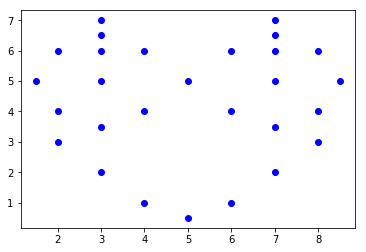

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

xs = [data.x for data in scatter_data]
ys = [data.y for data in scatter_data]

plt.plot(xs, ys, 'bo')
plt.show()

Now we have a plot! ... kind of... It doesn't really look like much.

A friend of us, who really loves Doe's art, is telling me that the result we got above, is actually the superposition of two of his math works.

### Step 7: Understanding the result set

In [39]:
artworks = {}
for data in scatter_data:
    if data.reference not in artworks:
        artworks[data.reference] = {'x': [], 'y': []}
    artworks[data.reference]['x'].append(data.x)
    artworks[data.reference]['y'].append(data.y)

Now we have the artworks separated by it's reference title, let's see what they look like when we separate them.

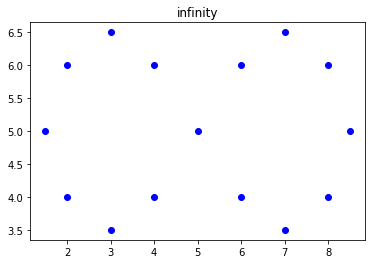

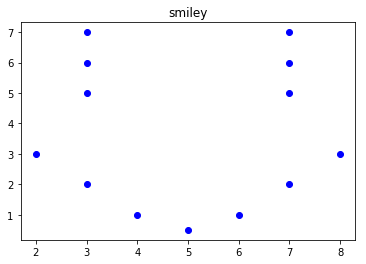

In [40]:
%matplotlib inline

for name, data in artworks.items():
    plt.plot(data['x'], data['y'], 'bo')
    plt.title(name)
    plt.show()

### Done! 🎉🎊👏
Now we've discovered Mr. Doe's artworks! And in the process understand a bit more of the flexibility and power that Contentful provides.

### What's next?
You may have noticed that we could have probably avoided having superposed artworks.

Can you figure out how? I'll give you a few options that you can later explore on your own.

* Use search filters from our [Search API](https://www.contentful.com/developers/docs/references/content-delivery-api/#/reference/search-parameters)
* Create an "Artwork" content type that contains a reference to all points in our artwork, then we can fetch the given artwork (or all of them), and avoid having to do any manual mapping.

We're looking forward to hearing about other interesting solutions you've found! And of course we'd love to see what you can do with Contentful.

Also, if you like to learn more about the available Contentful tools and tutorials in Python, you can read more [here](https://www.contentful.com/developers/docs/python/).

Please feel free to provide us with feedback and contribute to our [repositories](https://github.com/contentful)